In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Load the preprocessed wine dataset
file_path = r"C:\Users\goura\Desktop\PythonProjects\kNN\wines.csv"
df_wine = pd.read_csv(file_path)

In [7]:
#Step 1:Handle Missing or Non-Numeric Values
df_wine.replace("N.V.", np.nan, inplace=True)  # Replace 'N.V.' with NaN
df_wine.dropna(inplace=True)  # Drop missing values (OR use imputation

In [9]:
#Step 2: Convert Categorical Columns to Numeric
if df_wine['type'].dtype == 'object':  # Check if 'type' is categorical
    df_wine['type'] = df_wine['type'].astype('category').cat.codes  # Label Encoding

In [11]:
#Step 3: Features (X) and Target (y)
X = df_wine.drop(columns=['type'])
y = df_wine['type']

In [13]:
#Step 4: Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
#Step 5: Implement k-NN Classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
#Step 6: Predictions
y_pred = knn.predict(X_test)

In [19]:
#Step 7: Identify Correct & Wrong Predictions
correct_predictions = (y_pred == y_test).sum()
wrong_predictions = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")

Correct Predictions: 35
Wrong Predictions: 23


In [21]:
#Step 8: Confusion Matrix & Performance Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Accuracy:", accuracy)
print("\n🔹 Classification Report:\n", classification_rep)


🔹 Confusion Matrix:
 [[ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  2  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  2  1  0  0]
 [ 0  1  0  3  0 32  1  0  0]
 [ 0  0  0  2  0  1  1  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  3  0  0  0]]

🔹 Accuracy: 0.603448275862069

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.74      0.86      0.80        37
           6       0.20      0.25      0.22         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4

    accuracy                           0.60        58
   macro avg       0.22      0.18      0.19        58

C:\Users\goura\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

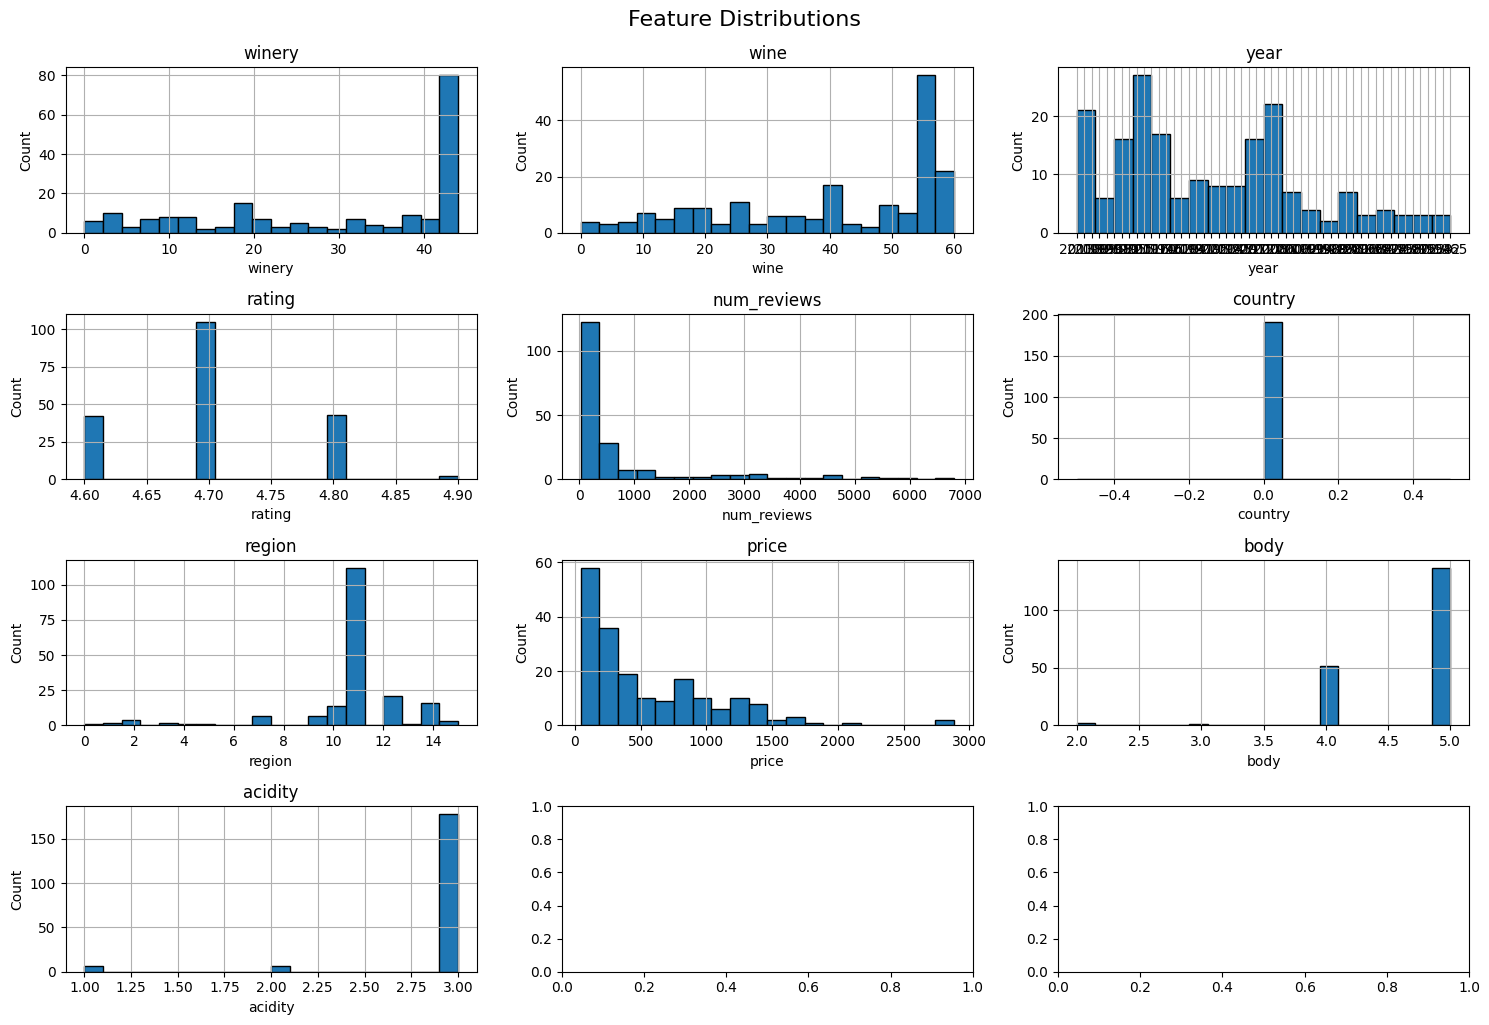

In [23]:
#Feature Distributions
features = X.columns
num_features = len(features)

fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 10))  # Grid Layout
axes = axes.flatten()  # Flatten the 2D array to 1D

for i, col in enumerate(features):
    df_wine[col].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.suptitle('Feature Distributions', fontsize=16, y=1.02)  # Adjust title position
plt.show()

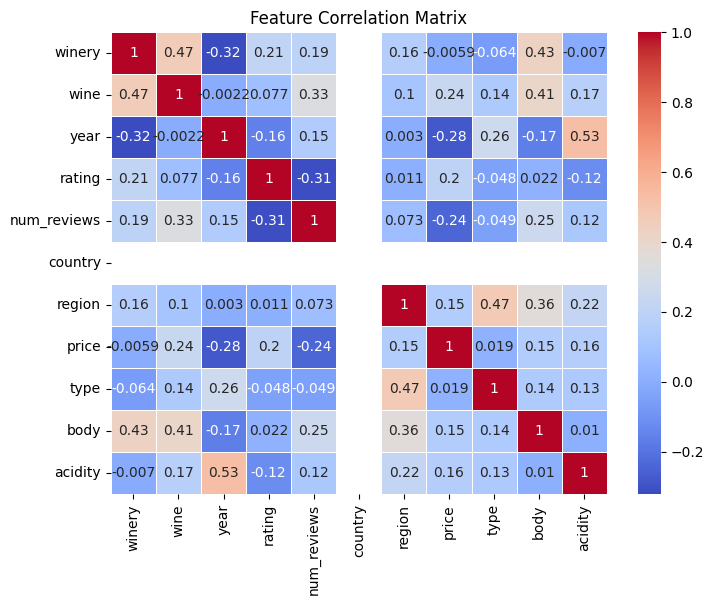

In [25]:
#Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_wine.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

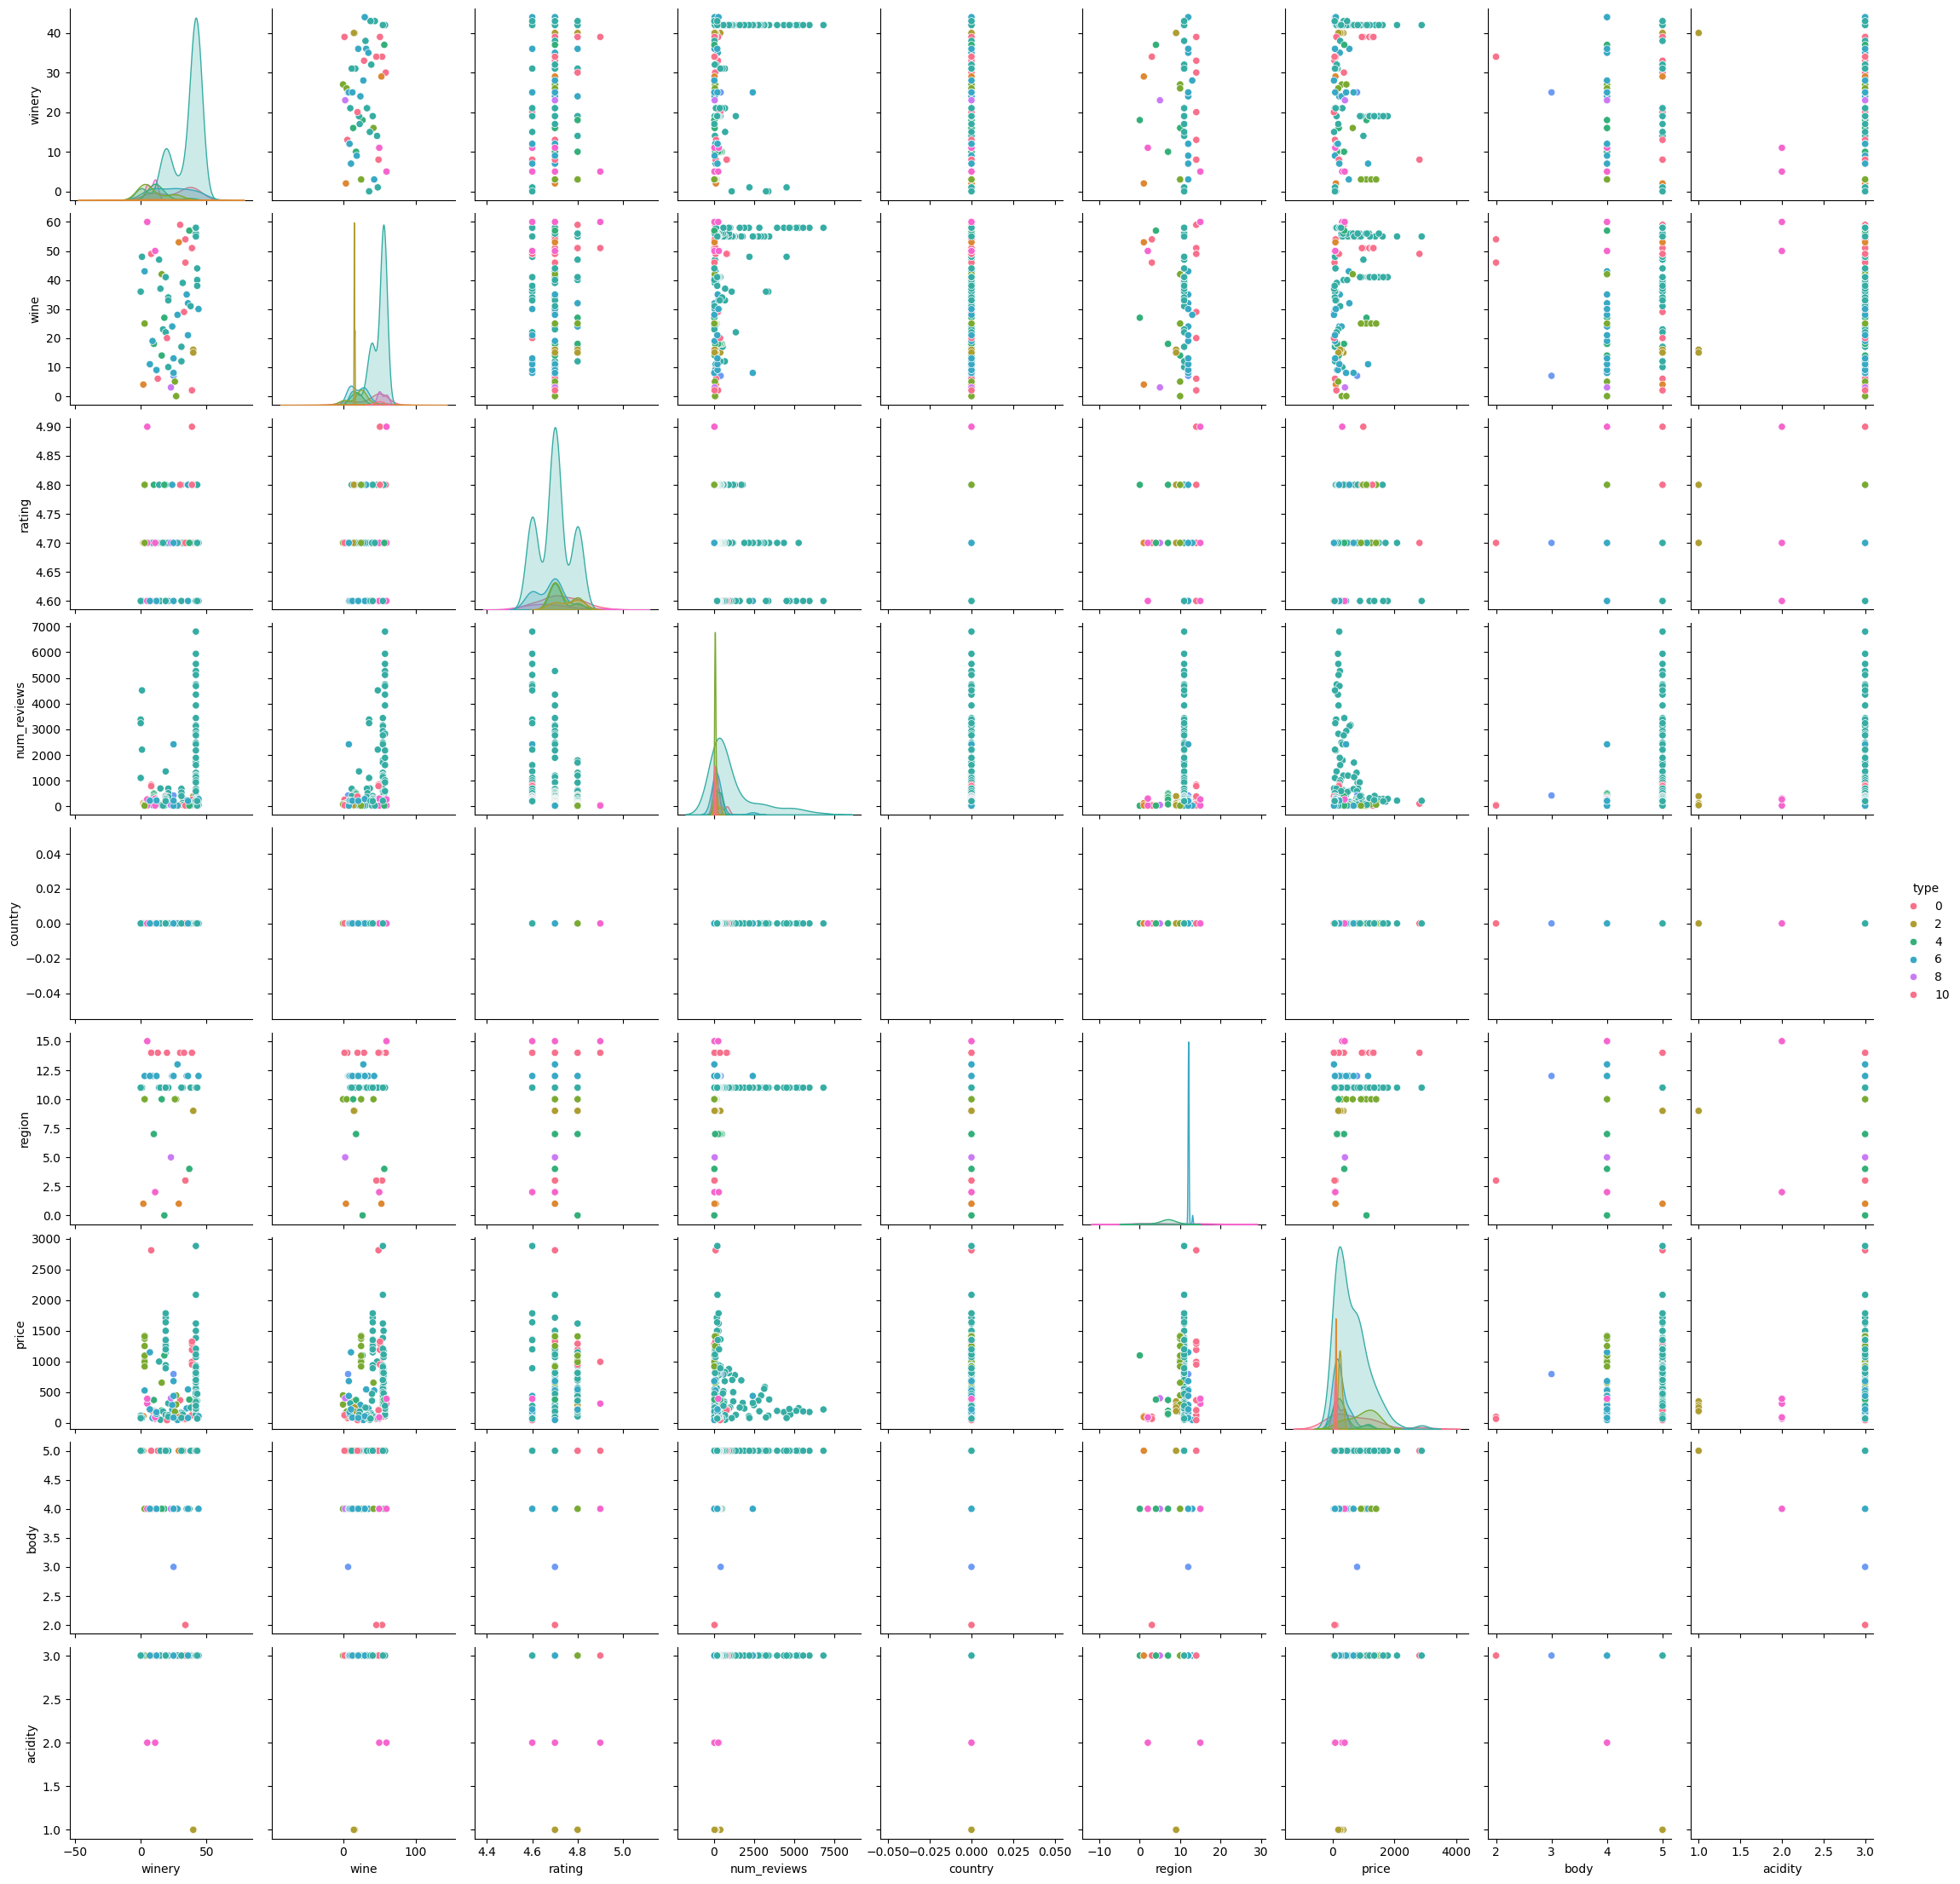

In [27]:
#Scatter Density Plot
sns.pairplot(df_wine, hue='type', palette="husl")
plt.show()